In [2]:
#Loading the Pre-Trained BERT Model
from transformers import BertTokenizer, BertModel # type: ignore
import torch # type: ignore

# Load pre-trained BERT base model
model = BertModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print("Model Loaded Successfully")

c:\DL\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model Loaded Successfully


In [3]:
from transformers import BertTokenizer
from torch.utils.data import DataLoader
from datasets import load_dataset
import pandas as pd

# Load the IMDB dataset
dataset = load_dataset('imdb')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Convert to pandas DataFrame
train_df = pd.DataFrame(tokenized_dataset['train'])
test_df = pd.DataFrame(tokenized_dataset['test'])

# Save DataFrames to CSV files
train_df.to_csv('tokenized_train.csv', index=False)
test_df.to_csv('tokenized_test.csv', index=False)

print("Tokenized datasets saved as CSV files.")

Tokenized datasets saved as CSV files.


In [4]:
#查看數據集
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


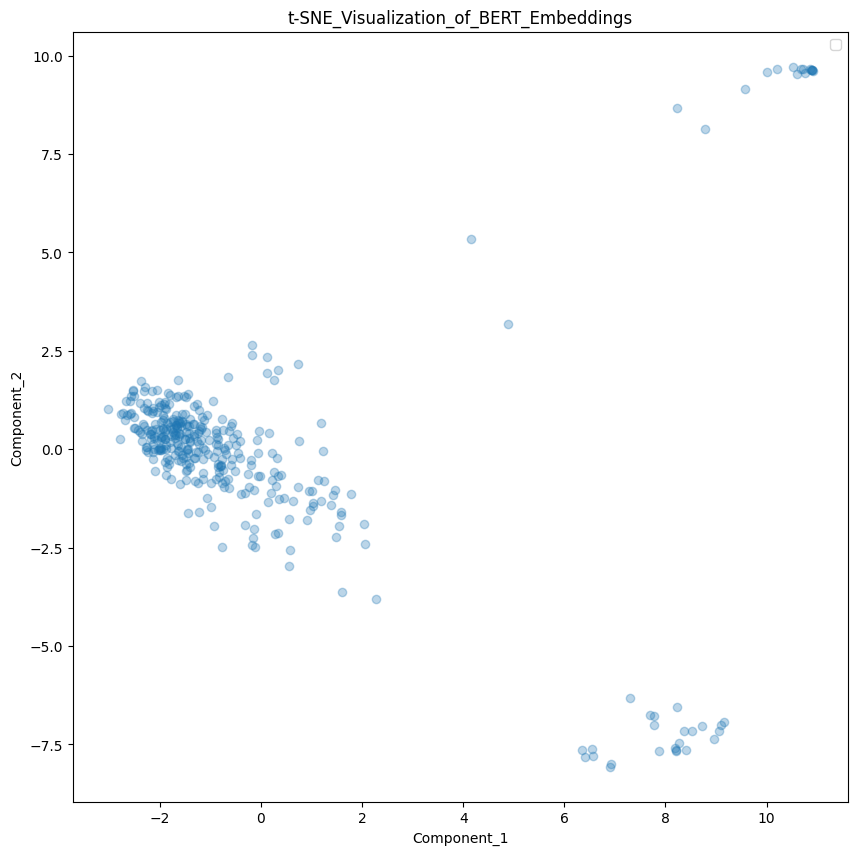

In [9]:
#Visualizing BERT Embeddings
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import torch

# Tokenize the text
text = dataset['train']['text'][0]
tokens = tokenizer.tokenize(text)
tokens = ['[CLS]'] + tokens + ['[SEP]']
input_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(input_ids).unsqueeze(0)  # Batch size 1

# Get the BERT embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs[0][:, 1:-1, :].squeeze(0).numpy()

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotting the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.3)

plt.legend()
plt.xlabel("Component_1")
plt.ylabel("Component_2")
plt.title("t-SNE_Visualization_of_BERT_Embeddings")
plt.show()